#### Reference 
https://elitedatascience.com/python-seaborn-tutorial

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pokemon_df=pd.read_csv('Pokemon.csv', index_col=0,encoding='iso-8859-1')
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [160]:
print("Checking Columns Datatypes")
print("Categorical:   ", len(pokemon_df.describe(include=['object']).columns), " : ",pokemon_df.describe(include=['object']).columns)
ind=pokemon_df.describe().columns
n_ind=ind.difference(pokemon_df.describe(include=['object']).columns)
print("N-Categorical: ",len(n_ind)," : ",n_ind)

Checking Columns Datatypes
Categorical:    3  :  Index(['Name', 'Type 1', 'Type 2'], dtype='object')
N-Categorical:  8  :  Index(['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage',
       'Total'],
      dtype='object')


In [52]:
%matplotlib inline

lmplot: Plot data and regression model fits across a FacetGrid.
Removing regression line and creating hue based on stages


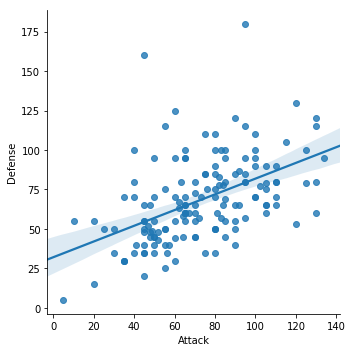

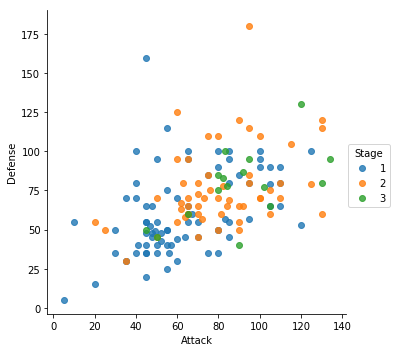

In [151]:
print("lmplot: Plot data and regression model fits across a FacetGrid.")
sns.lmplot(data=pokemon_df,x='Attack',y='Defense')
print("Removing regression line and creating hue based on stages")
sns.lmplot(data=pokemon_df,x='Attack',y='Defense', hue='Stage', fit_reg=False)

Changing the axis levels


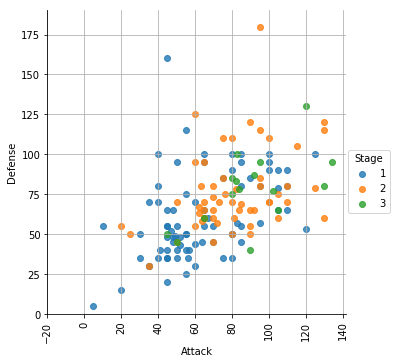

In [80]:
print("Changing the axis levels")
sns.lmplot(data=pokemon_df,x='Attack',y='Defense', hue='Stage', fit_reg=False)
plt.ylim(0,None)
plt.xlim(-20,None)
plt.xticks(rotation=90)
plt.grid(b=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

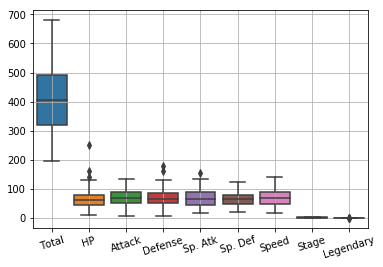

In [84]:
sns.boxplot(data=pokemon_df)
plt.grid(b=True)
plt.xticks(rotation=17)

removing some unwanted data like total, stage & legendary


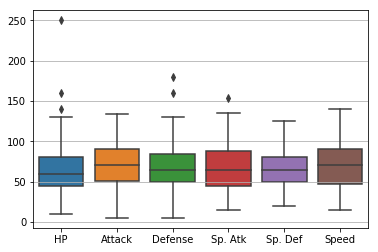

In [87]:
print("removing some unwanted data like total, stage & legendary")
#plt.xticks(rotation=17)
plt.grid(b=True)
sns.boxplot(data=pokemon_df.drop(['Total','Stage','Legendary'],axis=1))

In [95]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

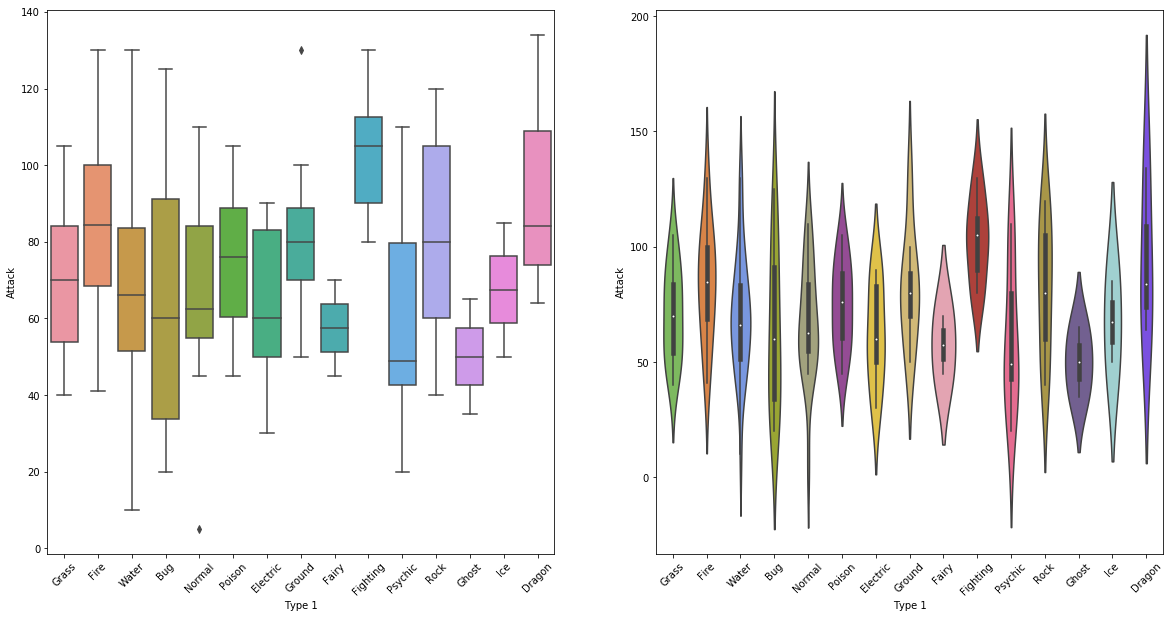

In [97]:
plt.figure(figsize=(20,10))
plt.grid(b=True)

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.boxplot(data=pokemon_df.drop(['Total','Stage','Legendary'],axis=1),x='Type 1',y='Attack')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.violinplot(data=pokemon_df.drop(['Total','Stage','Legendary'],axis=1),x='Type 1',y='Attack', palette=pkmn_type_colors)

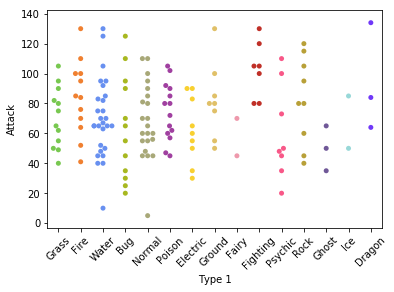

In [100]:
plt.xticks(rotation=45)
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=pokemon_df, 
              palette=pkmn_type_colors)

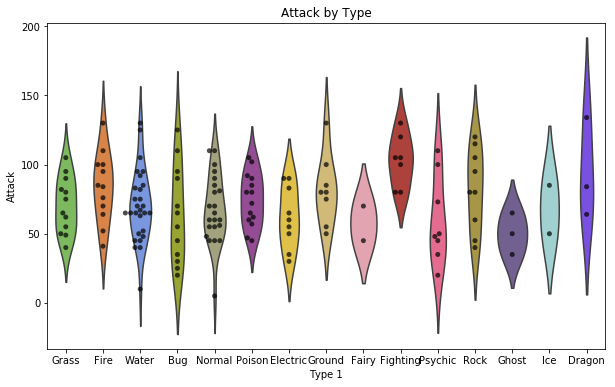

In [101]:
#Overlaying swarm and violin plots

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=pokemon_df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=pokemon_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [118]:
stats_df=pokemon_df.drop(['Total','Stage','Legendary'],axis=1)
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat", value_name='Stat Value') # Name of melted variable
melted_df[melted_df['Type 1']=='Ghost'].head(20)

,Name,Type 1,Type 2,Stat,Stat Value
91,Gastly,Ghost,Poison,HP,30
92,Haunter,Ghost,Poison,HP,45
93,Gengar,Ghost,Poison,HP,60
242,Gastly,Ghost,Poison,Attack,35
243,Haunter,Ghost,Poison,Attack,50
244,Gengar,Ghost,Poison,Attack,65
393,Gastly,Ghost,Poison,Defense,30
394,Haunter,Ghost,Poison,Defense,45
395,Gengar,Ghost,Poison,Defense,60
544,Gastly,Ghost,Poison,Sp. Atk,100


In [119]:
stats_df[stats_df['Type 1']=='Ghost'].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
92,Gastly,Ghost,Poison,30,35,30,100,35,80
93,Haunter,Ghost,Poison,45,50,45,115,55,95
94,Gengar,Ghost,Poison,60,65,60,130,75,110


In [105]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  Examples
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:2764: UserWarning: The `split` parameter has been renamed to `dodge`.
  


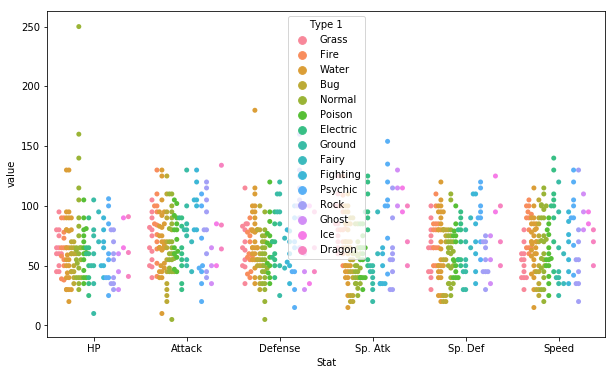

In [113]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1), loc=2)
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1', 
              split=True)

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


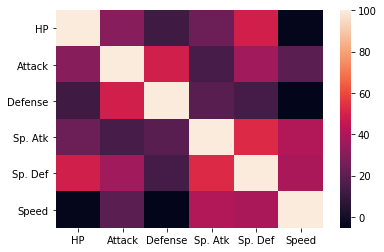

In [122]:
corr=stats_df.corr()
print(corr)
sns.heatmap(corr*100)

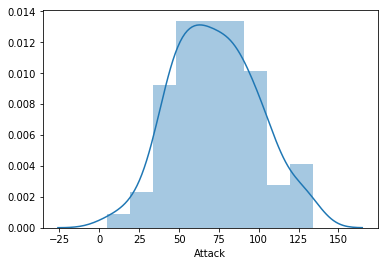

In [123]:
sns.distplot(stats_df.Attack)

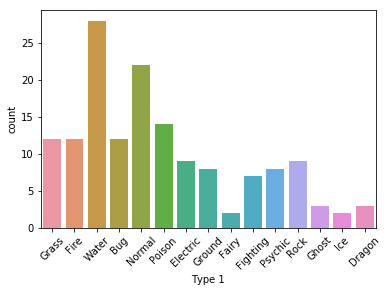

In [126]:
plt.xticks(rotation=45)
sns.countplot(data=stats_df,x='Type 1')

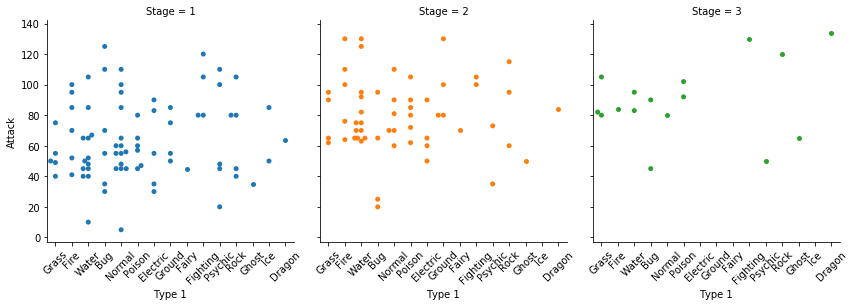

In [136]:
g=sns.factorplot(data=pokemon_df,x='Type 1', hue='Stage',y='Attack',col='Stage', kind='swarm') # Separate by stage # Color by stage
g.set_xticklabels(rotation=45)

In [143]:
pokemon_df.groupby(['Stage'])['Type 1'].count()

Stage
1    79
2    56
3    16
Name: Type 1, dtype: int64

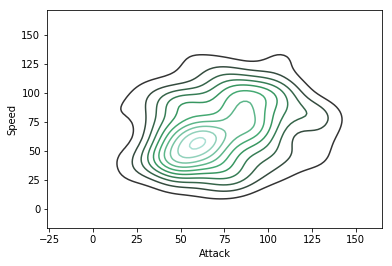

In [145]:
#Density plots display the distribution between two variables.

sns.kdeplot(pokemon_df.Attack, pokemon_df.Speed)

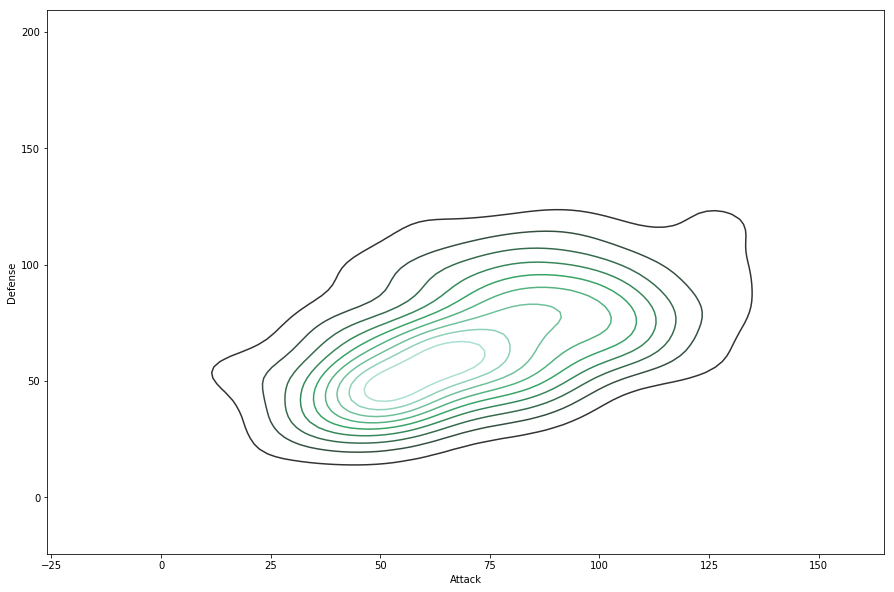

In [150]:
plt.figure(figsize=(15,10))
sns.kdeplot(pokemon_df.Attack, pokemon_df.Defense)
#sns.swarmplot(data=pokemon_df,x='Attack',y='Defense')

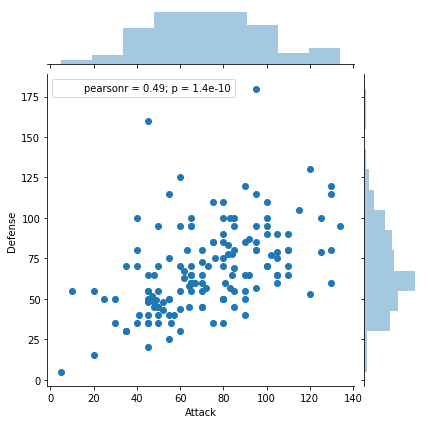

In [148]:
sns.jointplot(data=pokemon_df,x='Attack',y='Defense')

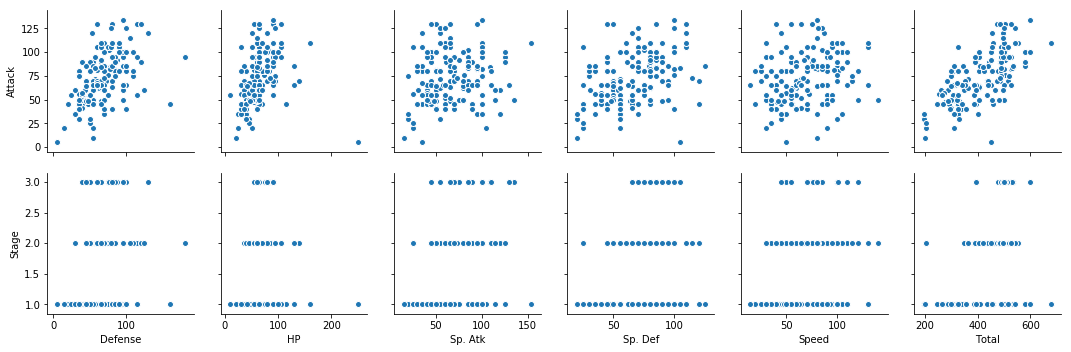

In [166]:
sns.pairplot(data=pokemon_df,x_vars=n_ind.drop(['Attack','Stage']),y_vars=['Attack','Stage'])

Index(['Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Total'], dtype='object')

In [163]:
n_ind

Index(['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage',
       'Total'],
      dtype='object')